# Building a Regression Model

In [1]:
# Importing the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Downloaded the Dataset
# 2. Loading the dataset

df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


(array([632., 783., 827., 824., 616., 286., 129.,  58.,  16.,   6.]),
 array([2.00000e-03, 2.84350e-01, 5.66700e-01, 8.49050e-01, 1.13140e+00,
        1.41375e+00, 1.69610e+00, 1.97845e+00, 2.26080e+00, 2.54315e+00,
        2.82550e+00]),
 <BarContainer object of 10 artists>)

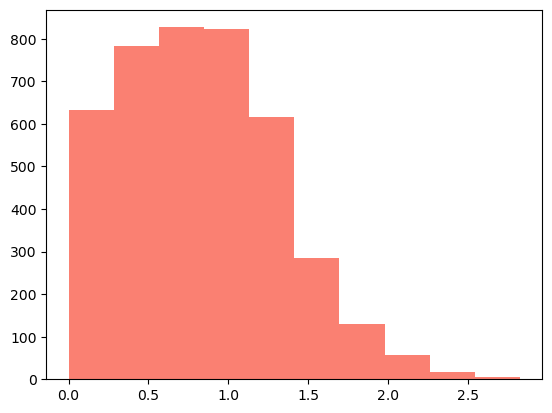

In [3]:
# 3. Performing Various Visualizations

# i. Univariate Analysis

plt.hist(df['Whole weight'], color='salmon')

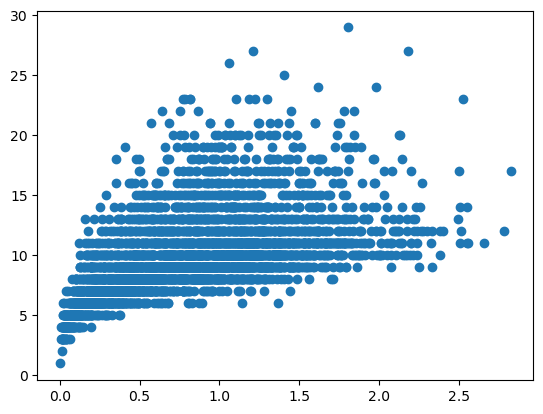

In [4]:
# ii. Bi-Variate Analysis

plt.scatter(df['Whole weight'], df['Rings'])

C:\Users\Family\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Whole weight', ylabel='Height'>

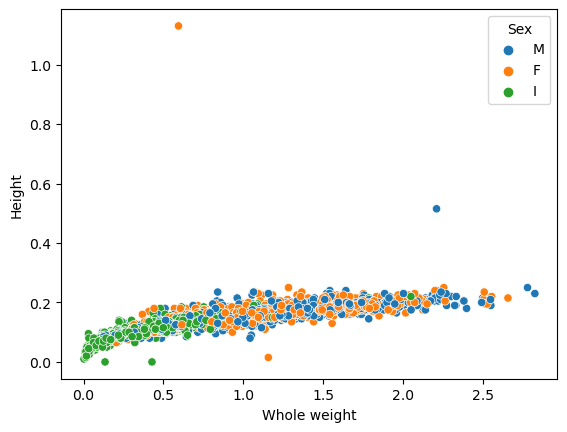

In [5]:
# iii. Multivariate Analysis

sns.scatterplot(df['Whole weight'], df['Height'], hue = df['Sex'])

In [6]:
# 4. Perform descriptive statistics on the dataset.

df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
# 5. Check for Missing values and deal with them.

df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
df['Length'].fillna(df['Length'].mean(), inplace = True)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


C:\Users\Family\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

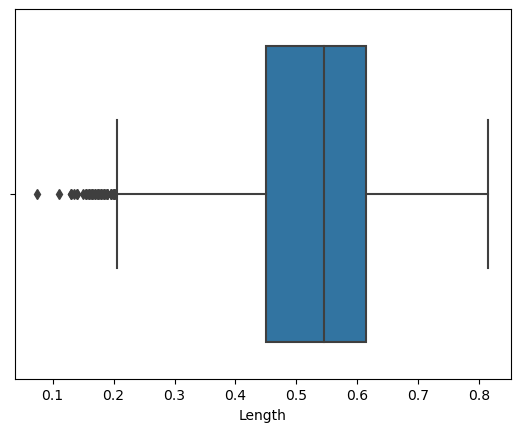

In [9]:
# 6.  Find the outliers and replace them outliers

sns.boxplot(df.Length)

In [10]:
quantile = df.quantile(q=[0.25,0.75])

quantile

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


In [11]:
IQR = quantile.iloc[0] - quantile.iloc[1]
IQR

Length           -0.1650
Diameter         -0.1300
Height           -0.0500
Whole weight     -0.7115
Shucked weight   -0.3160
Viscera weight   -0.1595
Shell weight     -0.1990
Rings            -3.0000
dtype: float64

In [12]:
upper_limit = quantile.iloc[0] + (1.5 * IQR)

upper_limit

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64

In [13]:
lower_limit = quantile.iloc[1] - (1.5 * IQR)

lower_limit

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64

In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [16]:
# 7. Check for Categorical columns and perform encoding.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [17]:
import category_encoders as ce

encoder=ce.OneHotEncoder(cols='Sex',handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [18]:
data_encoded = encoder.fit_transform(df)
data_encoded.head()

,Sex_M,Sex_F,Sex_I,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1.0,0.0,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,1.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1.0,0.0,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.0,0.0,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
# 8. Split the data into dependent and independent variables.

x = df['Length'].values
y = df['Diameter'].values

In [20]:
x

array([0.455, 0.35 , 0.53 , ..., 0.6  , 0.625, 0.71 ])

In [21]:
y

array([0.365, 0.265, 0.42 , ..., 0.475, 0.485, 0.555])

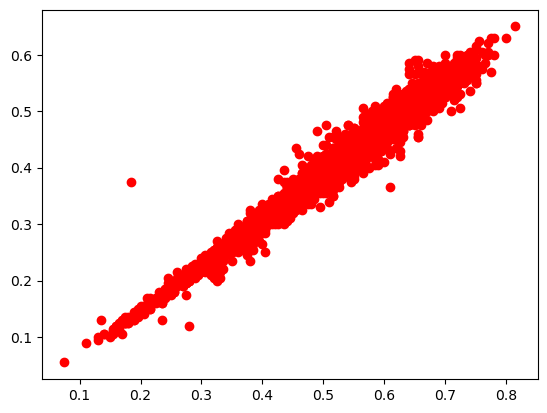

In [22]:
plt.scatter(df['Length'], df['Diameter'], color = 'red')

In [23]:
# 9. Scale the independent variables

x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [24]:
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [25]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [26]:
names = x.columns

names

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [27]:
from sklearn.preprocessing import scale

In [28]:
x = scale(x)

In [29]:
x

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [30]:
x = pd.DataFrame(x, columns=names)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [31]:
# 10. Split the data into training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size = 0.2)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()

In [34]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [35]:
# Predict

predictions = lin_reg.predict(x_test)

In [36]:
from sklearn import metrics

# Accuracy

metrics.r2_score(y_test, predictions)

0.5521896161271272